In [1]:
import os, sys
currentdir = os.path.realpath(os.path.abspath(""))
scriptsdir = os.path.dirname(currentdir)
if scriptsdir not in sys.path:
    sys.path.append(scriptsdir)

# uncomment configuration if don't want show multiple outputs in a cell
from customscripts import configuration
from customscripts import utils

import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
comtrade_data = utils.get_clean_comtrade()

## Relationship between different dimensions
since the dataset after cleaning only contains 5 dimensions, with the first dimensions being all 2020, so actually we can only use 4 dimensions in this subdataset, so we can visualize the relationship between 'Trade Value' and other 3 dims.

<AxesSubplot:xlabel='Reporter'>

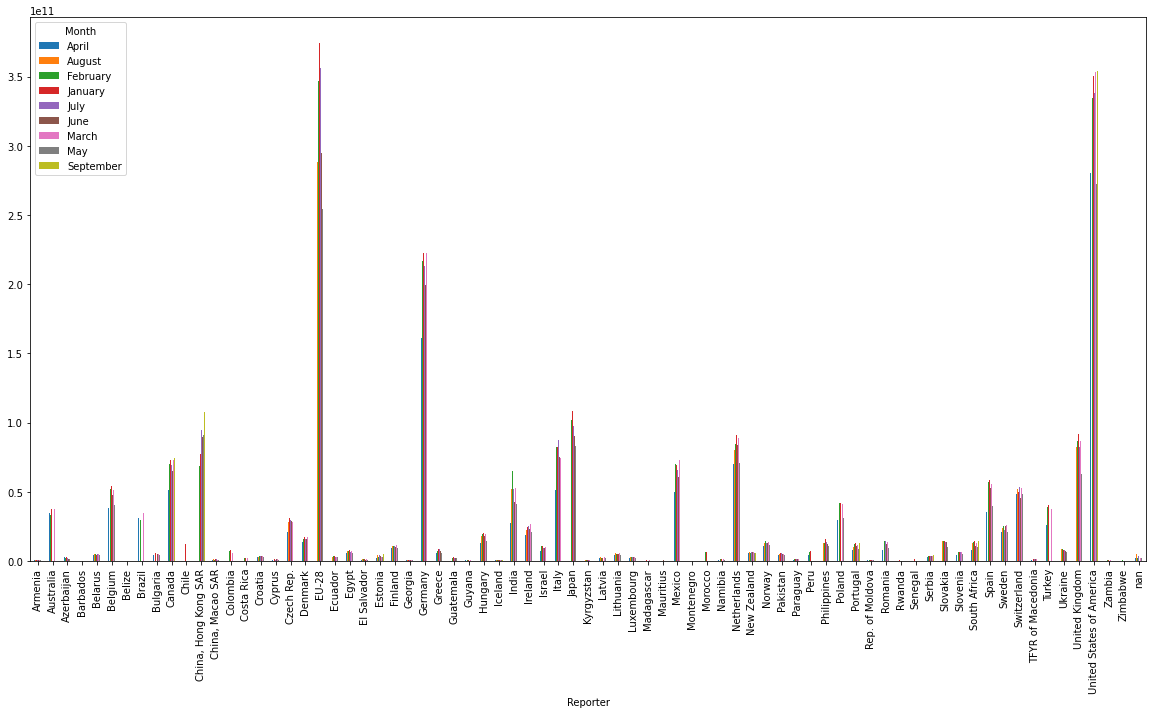

In [3]:
# see the trade value given different reporters, and for each reporter show the difference of each month
# here define the parameter dropna=Flase since there exists reporter with no name in this file
# since there are too many countries, then the visualization is not very clear, so in the future we can try to analyse only, maybe top 10 countries
country = comtrade_data['Trade Value (US$)'] \
    .groupby([comtrade_data['Reporter'], comtrade_data['Month']], dropna=False) \
    .sum() \
    .unstack()
country.plot(kind="bar", figsize=(20, 10))

<AxesSubplot:xlabel='Reporter'>

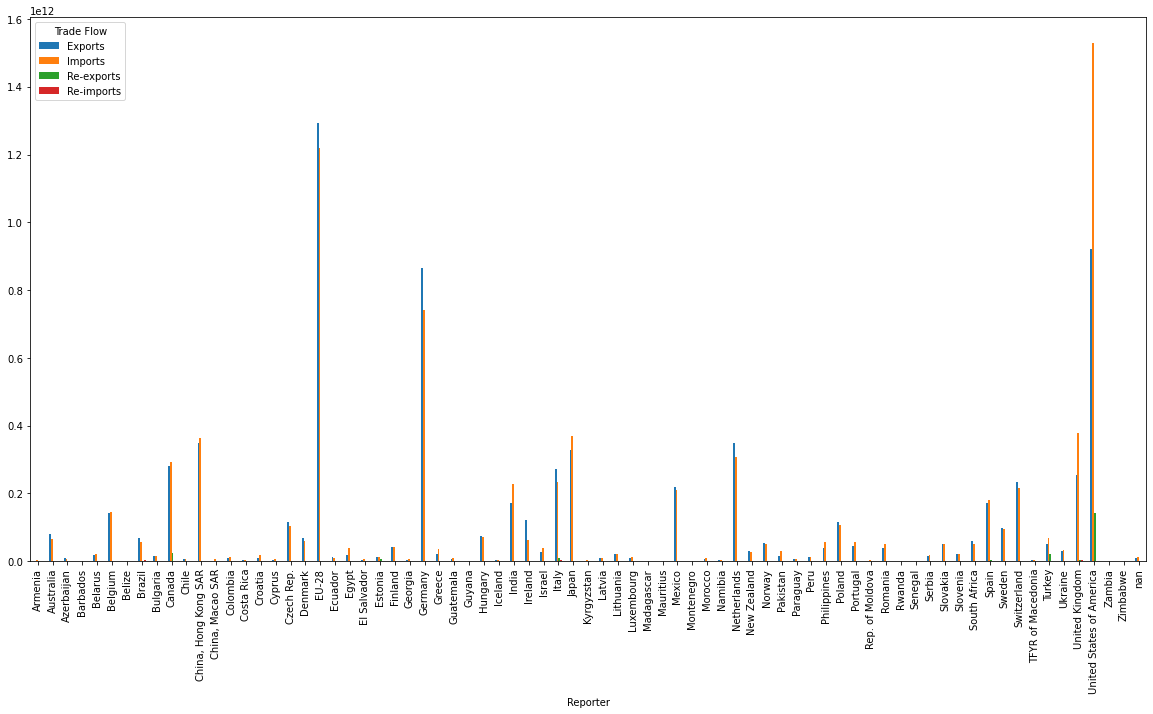

In [4]:
# visualize the trade value given different reporters, and for each reporter show the difference between trade flows
# to see which kind of trade flow can make the most profit in average
comtrade_data['Trade Value (US$)'] \
    .groupby([comtrade_data['Reporter'], comtrade_data['Trade Flow']], dropna=False) \
    .sum() \
    .unstack() \
    .plot(kind="bar", figsize=(20, 10))

<AxesSubplot:ylabel='Reporter'>

Text(0.5, 0, 'Trave Value (US$)')

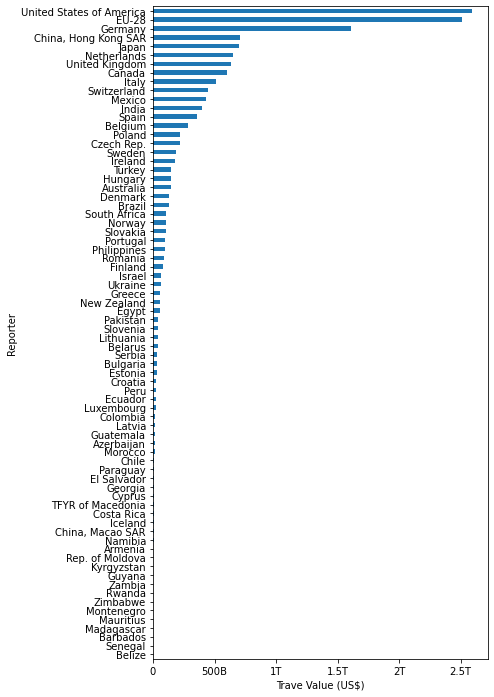

In [5]:
# we can see the trade values of top countries in this way
# We can note that most of the trades, almost 85% of them, are below 20,000,000 (20 mil) dollars of value.
import matplotlib.ticker as ticker
fig, ax = plt.subplots()

comtrade_data \
    .groupby("Reporter")["Trade Value (US$)"] \
    .sum() \
    .sort_values(ascending=False) \
    .plot(kind="barh", figsize=(6, 12), ax=ax)

ax.invert_yaxis()  # labels read top-to-bottom

formatter = ticker.FuncFormatter(utils.human_format)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_label_text("Trade Value (US$)")

plt.show()

In [6]:
comtrade_data \
    .groupby("Reporter")["Trade Value (US$)"] \
    .sum() \
    .sort_values(ascending=False) \
    .head(5)

Reporter
United States of America    2590200198280
EU-28                       2511265530637
Germany                     1604819753694
China, Hong Kong SAR         711109481524
Japan                        698012571883
Name: Trade Value (US$), dtype: int64

We can see how very few countries get to be on the top:  
1. United States  
2. Europe  
3. Germany  
4. Hong Kong  
5. Japan

Let's see then, all the countries that, for example, trade less than $50B

<AxesSubplot:xlabel='Month'>

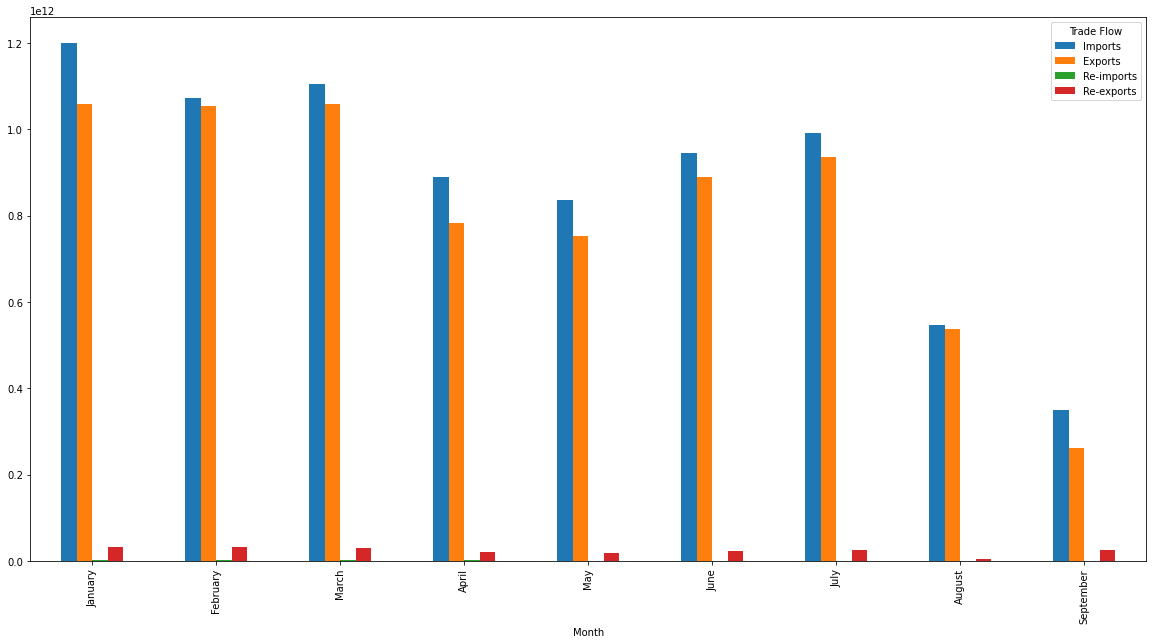

In [7]:
# here set the sort=Flase to make the data ordered as time sequence, not alphabetically
# this comparison shows that it's mainly import and export that create the trade value, re-import and re-export in comparison make littel contribution
country = comtrade_data['Trade Value (US$)'] \
    .groupby([comtrade_data['Month'], comtrade_data['Trade Flow']], sort=False) \
    .sum() \
    .unstack()
country.plot(kind="bar", figsize=(20, 10))

<AxesSubplot:title={'center':'Total trade value for different trade flow'}, ylabel='Trade Flow'>

<AxesSubplot:title={'center':'Total trade value of different reporter'}, xlabel='Reporter'>

pandas.core.series.Series

<AxesSubplot:title={'center':'Total trade value in different time period'}, xlabel='Month'>

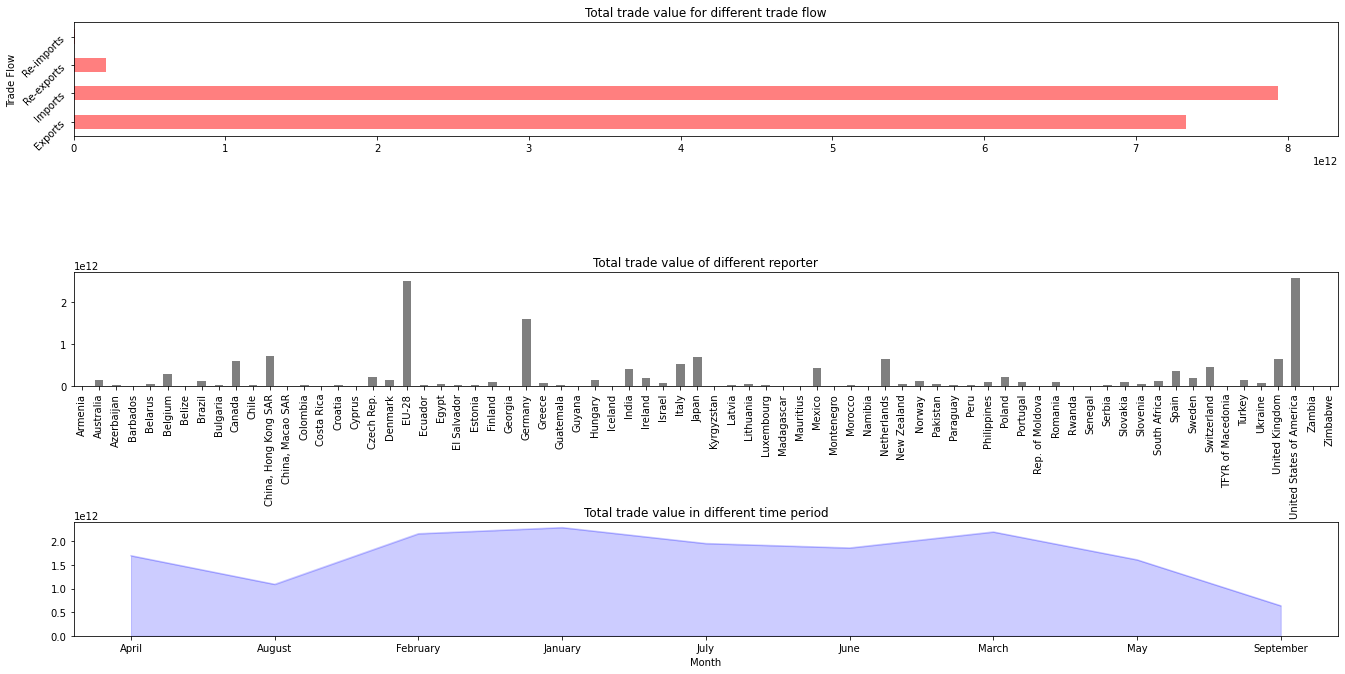

In [8]:
# now return to 2D drawing
# more or less like summary information compared to the last cell
fig_1, ax_1 = plt.subplots(3,1)

# set the layout between different subplots for better visualization
fig_1.tight_layout()
plt.subplots_adjust(wspace=0, hspace=1.2)

# to see which kind of trade flows can create the most trade value
# in alignment with the cell above, the influence of import and export is much larger than re-import and re-export
tradevalue_tradeflow = comtrade_data.groupby('Trade Flow')['Trade Value (US$)'].sum()
tradevalue_tradeflow.plot(kind='barh', ax=ax_1[0], color='r', alpha=0.5, title="Total trade value for different trade flow", rot=45)

# to see which country can create the most trade value
tradevalue_reporter = comtrade_data.groupby('Reporter')['Trade Value (US$)'].sum()
tradevalue_reporter.plot(kind='bar', ax=ax_1[1], color='k', alpha=0.5, figsize=(20, 10), title="Total trade value of different reporter")

# to see which time period can create the most trade value
# Hmmmm....the month here is ordered alphabetically again, sort_column seems of no use???
tradevalue_period = comtrade_data.groupby('Month')['Trade Value (US$)'].sum()
type(tradevalue_period)
tradevalue_period.plot(kind='area', ax=ax_1[2], color='b', alpha=0.2, title="Total trade value in different time period", sort_columns=False)

## Statistical properties of 'Trade Flow'
End up with relationships between different dimensions, now we begin to deal with somewhat individual dimensions. First we can have a look at the dimension - 'Trade Flow'

<AxesSubplot:xlabel='Reporter'>

<AxesSubplot:xlabel='Reporter'>

<AxesSubplot:xlabel='Month'>

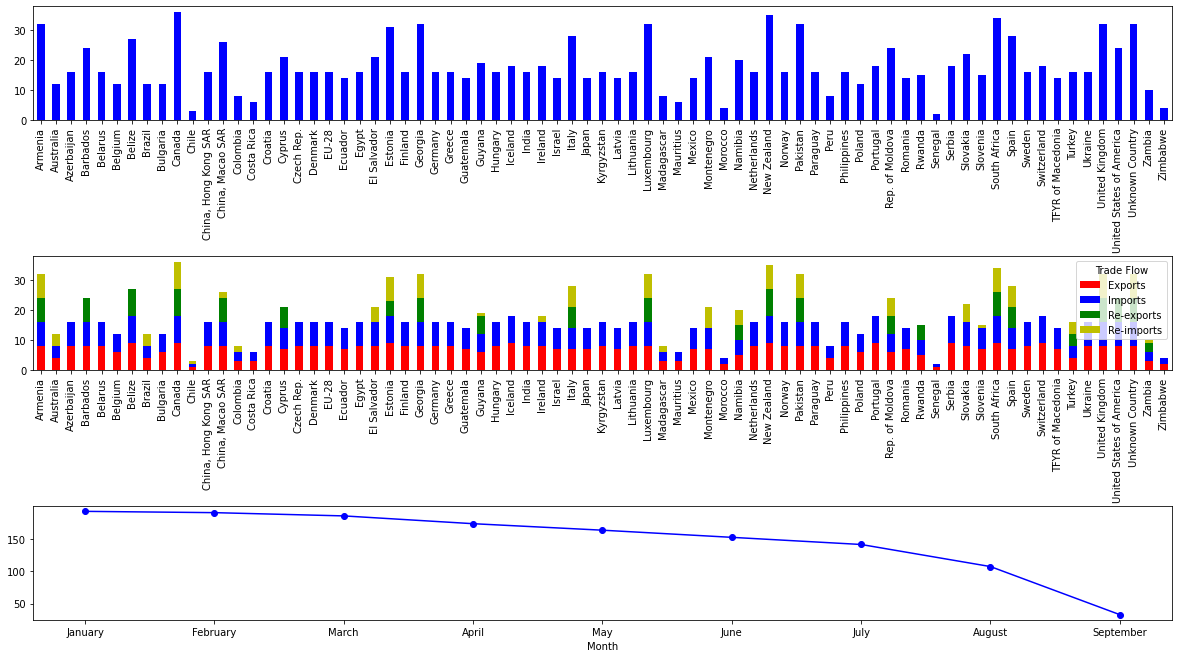

In [9]:
fig_2, ax_2 = plt.subplots(3,1)

# set the layout between different subplots for better visualization
fig_2.tight_layout()
plt.subplots_adjust(wspace=0, hspace=1.2)

# here we show the total number of all kinds of trade flows of each reporter, which kind of reflecting the custom's workload of each country? (Well, I guess :D)
flow_count_reporter = comtrade_data.fillna('Unknown Country').groupby('Reporter').size()
flow_count_reporter.plot(kind='bar', ax=ax_2[0], x = 'Reporter', y = 'Count', color = 'b', legend = False, figsize=(18,10))

# what if we want to see the influence of each kind of trade flow to the total trade flow count?
trade_type = comtrade_data.fillna('Unknown Country').groupby(['Reporter', 'Trade Flow']).size().reset_index(name = 'Count')
trade_type_count = trade_type.groupby(['Reporter', 'Trade Flow']).Count.sum()
trade_type_count.unstack().plot(kind='bar', ax=ax_2[1], stacked=True, color=['r','b','g','y'])


# Then we show the total number of all kinds of trade flows in each month, to see which trend this time sequence data can show
# And this line shows a descending trend of trade flows numbers with the development of time, which is not the same as trade value shows
flow_count_month = comtrade_data.groupby('Month').size().reindex(utils.get_2020_months())
flow_count_month.plot(ax=ax_2[2], x = 'Month', y = 'Count', color = 'b', marker = 'o')



<AxesSubplot:title={'center':'Ratio between export/import'}, xlabel='Reporter', ylabel='Export / Import Ratio'>

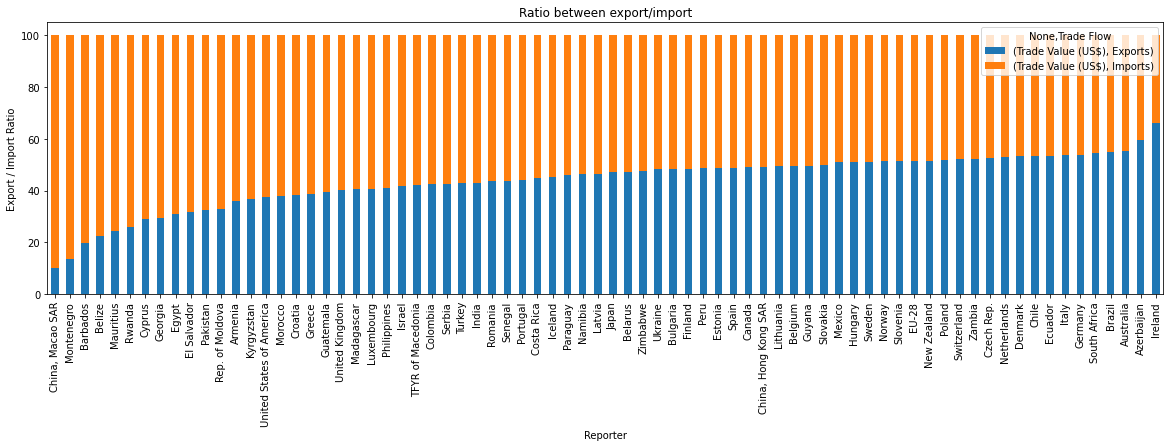

In [10]:
# then what about the ratio between trade value created by import and export?
# here we show the ratio of imports in ascending way
data_import_export_ratio = comtrade_data[comtrade_data["Trade Flow"].isin(["Imports", "Exports"])] \
    .groupby(["Reporter", "Trade Flow"]).agg({"Trade Value (US$)": sum}) \
    .groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack().fillna(0) \
    .sort_values(by=('Trade Value (US$)', 'Imports'), ascending=False)

data_import_export_ratio \
    .plot(kind="bar", stacked=True, figsize=(20, 5), title="Ratio between export/import", ylabel="Export / Import Ratio")

## Statistical properties of 'Trade Value'
Then we can dig into the dimension - 'Trade Value'

In [11]:
# first let's see some typecal values in this dimension
print(f"Min trade value: $ {comtrade_data['Trade Value (US$)'].min():,}")
print(f"Max trade value: $ {comtrade_data['Trade Value (US$)'].max():,}")
print(f"Mean trade value: $ {comtrade_data['Trade Value (US$)'].mean():,}")
print(f"Median trade value: $ {comtrade_data['Trade Value (US$)'].median():,}")

# to see the quantile numbers of trade value
comtrade_data['Trade Value (US$)'].quantile([0.25, 0.5, 0.75])

Min trade value: $ 1,763
Max trade value: $ 212,436,902,064
Mean trade value: $ 11,593,872,826.48503
Median trade value: $ 1,641,579,738.5


0.25    2.146346e+08
0.50    1.641580e+09
0.75    7.792940e+09
Name: Trade Value (US$), dtype: float64

<AxesSubplot:xlabel='Month'>

<AxesSubplot:title={'center':'Percentage of each class'}, ylabel='Trade Amount'>

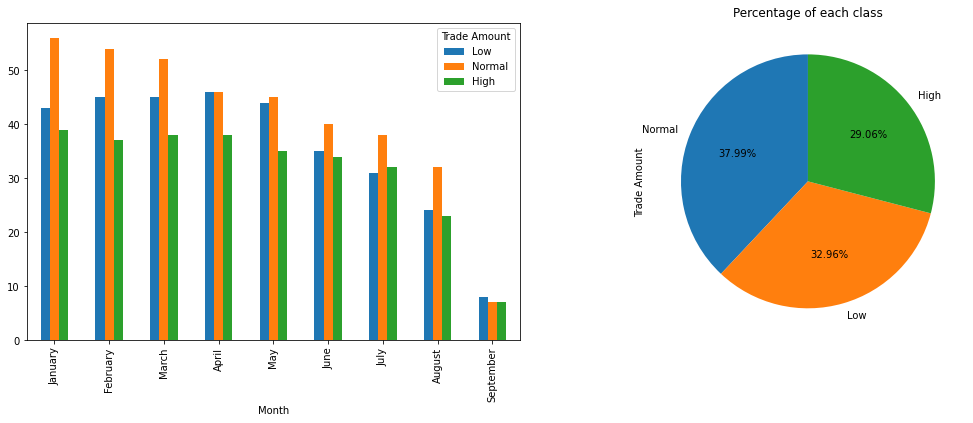

In [12]:
# set the boundaries somewhat randomly by just have a glance at the mean, median data etc
# can set the boundaries more precisely later
# to address the trade value's pie diagram in an appropriate way, we use the instruction of quantile numbers
# even if a country's trade value is less than mean value, it still is a normal phenomenon
# which shows the great gap between the trade values
fig_3, ax_3 = plt.subplots(1,2)
fig_3.set_figheight(5)
fig_3.set_figwidth(15)
fig_3.tight_layout()

comtrade_data_trade_amount = comtrade_data
comtrade_data_trade_amount['Trade Amount'] = pd.cut(comtrade_data['Trade Value (US$)'], bins = [0, 2e8, 2e9, 7e9], labels=["Low", 'Normal', 'High'])
trade_class_month = comtrade_data_trade_amount.groupby(['Month', 'Trade Amount']).size().unstack()[["Low", 'Normal', 'High']].reindex(utils.get_2020_months())
trade_class_month.plot(kind = 'bar', ax=ax_3[0])


comtrade_data['Trade Amount'].value_counts().plot(kind='pie', ax=ax_3[1], autopct='%.2f%%', startangle=90, title='Percentage of each class')


{'bodies': [<matplotlib.collections.PolyCollection at 0x2828d515888>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2828debce08>,
 'cmins': <matplotlib.collections.LineCollection at 0x2828d79e488>,
 'cbars': <matplotlib.collections.LineCollection at 0x2828d7a31c8>}

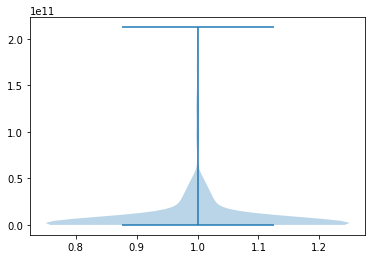

In [13]:
plt.violinplot(comtrade_data['Trade Value (US$)'])

<AxesSubplot:title={'center':'Trade Value (US$) by Country'}, ylabel='Reporter'>

Text(0.5, 0, 'Trave Value (US$)')

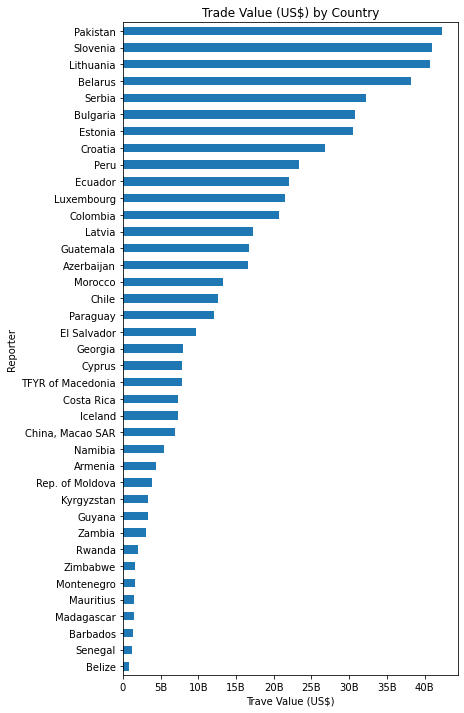

In [14]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots()

comtrate_data_lowest_50b = comtrade_data \
    .groupby("Reporter")["Trade Value (US$)"] \
    .sum() \
    .where(lambda x: x < 5e10).dropna() \
    .sort_values(ascending=False)
comtrate_data_lowest_50b \
    .plot(kind="barh", figsize=(6, 12), ax=ax, title="Trade Value (US$) by Country")


ax.invert_yaxis()  # labels read top-to-bottom

formatter = ticker.FuncFormatter(utils.human_format)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_label_text("Trave Value (US$)")

plt.show()

Of these countries, I am interested to see how much import/export they do, compared to the previous pie plot.

<AxesSubplot:ylabel='Trade Flow'>

Text(0.5, 1.0, 'Trade Count by Type')

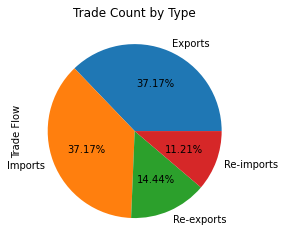

In [15]:
comtrade_data[comtrade_data["Reporter"].isin(comtrate_data_lowest_50b.index)] \
    .groupby('Trade Flow')["Trade Flow"].count() \
    .plot(kind="pie", autopct="%.2f%%", startangle=0)
plt.title("Trade Count by Type")

Not much has changed really. The change of percentage for imports-exports is barely noticeable.

However, I am curious to see how each country compares when it comes to amounts of imports-exports.

To have a clearer picture, we will remove the re-imports and re-exports from the graph.

In [16]:
# Less exporting / More importing and More exporting / Less importing countries
pd.concat([data_import_export_ratio.head(1), data_import_export_ratio.tail(1)])

Trade Value (US$)           
Trade Flow                 Exports    Imports
Reporter                                     
China, Macao SAR         10.126165  89.873835
Ireland                  66.105224  33.894776